<a href="https://colab.research.google.com/github/333CME/Challengue-TELECOM-X/blob/main/Proyecto_telecomx_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Extracción

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
datos_telecom=pd.read_json('/content/telecomx_data.json')
datos_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [147]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [148]:
#Ahora voy a eliminar, normalizar y concatener las columnas anidadas
datos_telecom = pd.concat([datos_telecom.drop(datos_telecom.columns[2:6], axis=1)] +
               [pd.json_normalize(datos_telecom[col]) for col in datos_telecom.columns[2:6]], axis=1)
datos_telecom.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [149]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


🔧 Transformación

In [150]:
valores_unicos = datos_telecom[['Churn']].drop_duplicates()  # DataFrame con valores únicos

In [152]:
# Eliminar filas con Churn vacío ("")
datos_telecom = datos_telecom[(datos_telecom['Churn'] != '')]
print(f"Filas restantes: {len(datos_telecom)}")  # Deberían ser 7267 - 213 = 7043

Filas restantes: 7043


In [153]:
# Eliminar las filas de Charges.Total vacío ("")
datos_telecom = datos_telecom[datos_telecom['Charges.Total'].str.strip() != ''].copy()
print(f"Filas restantes: {len(datos_telecom)}")

Filas restantes: 7032


In [155]:
datos_telecom.columns = datos_telecom.columns.str.lower()  # Elimino los Nombres de columnas en minúsculas

# Aplicar a todas las columnas de tipo 'object' (strings)
# Ahora si elimino los textos a minúsculas:
for col in datos_telecom.select_dtypes(include='object'):
    datos_telecom[col] = datos_telecom[col].str.lower()

In [156]:
# Usando el módulo estándar re
import re
# Visto en clases: Elimina todo excepto alfanuméricos y espacios
def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = re.sub(r'[^a-zA-Z0-9\s]', '', texto)
    return texto

# Aplicar a columnas de texto
for col in datos_telecom.select_dtypes(include='object').columns:
    datos_telecom[col] = datos_telecom[col].apply(limpiar_texto)

In [157]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

In [158]:
#ya está todo en minúsculas incluidos los títulos de las columnas
# Columnas con valores 'yes'/'no'/'no internet service'/'no phone service'
columnas_booleanas = [
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'paperlessbilling'
]

# Reemplazar 'no internet service' y 'no phone service' por 'no'
datos_telecom[columnas_booleanas] = datos_telecom[columnas_booleanas].replace(
    ['no internet service', 'no phone service'], 'no'
)

# Convertir a booleano (True/False)
for col in columnas_booleanas + ['churn']:
    datos_telecom[col] = datos_telecom[col].map({'yes': True, 'no': False})

# SeniorCitizen a booleano, ya es del tipo 0 y 1, no haré nada más por ahora
datos_telecom['seniorcitizen'] = datos_telecom['seniorcitizen'].astype(bool)

In [159]:
#Convertir de Charges.Total a numérico
# Me aseguro eliminando espacios y despúés convierto a float
datos_telecom['charges.total'] = datos_telecom['charges.total'].str.replace(' ', '').astype(float)

In [160]:
#datos_telecom.info()

In [161]:
#no me funcionó la conversión en todas las columnas booleanas
# tengo que buscar ayuda en IA

columnas_problematicas = ['partner', 'dependents', 'phoneservice', 'multiplelines',
                         'onlinesecurity', 'onlinebackup', 'deviceprotection',
                         'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']

for col in columnas_problematicas:
    print(f"Valores únicos en {col}: {datos_telecom[col].unique()}")


# Paso 1: Estandarizar a minúsculas y eliminar espacios
for col in columnas_problematicas:
    datos_telecom[col] = datos_telecom[col].astype(str).str.lower().str.strip()

    # Paso 2: Reemplazar 'no internet service' y 'no phone service' por 'no'
    datos_telecom[col] = datos_telecom[col].replace(
        ['no internet service', 'no phone service'],
        'no'
    )

    # Paso 3: Convertir a booleano (manejar casos inesperados)
    datos_telecom[col] = datos_telecom[col].apply(
        lambda x: True if x == 'yes' else False if x == 'no' else None
    ).astype(bool)  # Convertir a bool explícitamente


Valores únicos en partner: [ True False]
Valores únicos en dependents: [ True False]
Valores únicos en phoneservice: [ True False]
Valores únicos en multiplelines: [False  True]
Valores únicos en onlinesecurity: [False  True]
Valores únicos en onlinebackup: [ True False]
Valores únicos en deviceprotection: [False  True]
Valores únicos en techsupport: [ True False]
Valores únicos en streamingtv: [ True False]
Valores únicos en streamingmovies: [False  True]
Valores únicos en paperlessbilling: [ True False]


In [162]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   bool   
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   bool   
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   bool   
 11  onlinebackup      7032 non-null   bool   
 12  deviceprotection  7032 non-null   bool   
 13  techsupport       7032 non-null   bool   
 14  streamingtv       7032 non-null   bool   
 15  streamingmovies   7032 non-null   bool   
 16  contract          7032 non-null   object 
 17  

In [163]:
#finalmente pasaré a string:
# Lista de columnas a convertir a string
columnas_a_string = ['internetservice', 'contract', 'paymentmethod', 'gender', 'customerid']

# Aplicar conversión (incluso si ya son strings)
for col in columnas_a_string:
    datos_telecom[col] = datos_telecom[col].astype('string')

# Verificar cambios
print("\nTipos de datos actualizados:")
print(datos_telecom[columnas_a_string].dtypes)


Tipos de datos actualizados:
internetservice    string[python]
contract           string[python]
paymentmethod      string[python]
gender             string[python]
customerid         string[python]
dtype: object


In [164]:
#verificación final de la transformación
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   string 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   string 
 3   seniorcitizen     7032 non-null   bool   
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   bool   
 9   internetservice   7032 non-null   string 
 10  onlinesecurity    7032 non-null   bool   
 11  onlinebackup      7032 non-null   bool   
 12  deviceprotection  7032 non-null   bool   
 13  techsupport       7032 non-null   bool   
 14  streamingtv       7032 non-null   bool   
 15  streamingmovies   7032 non-null   bool   
 16  contract          7032 non-null   string 
 17  

📊 ETAPA DE CARGA Y ANÁLISIS

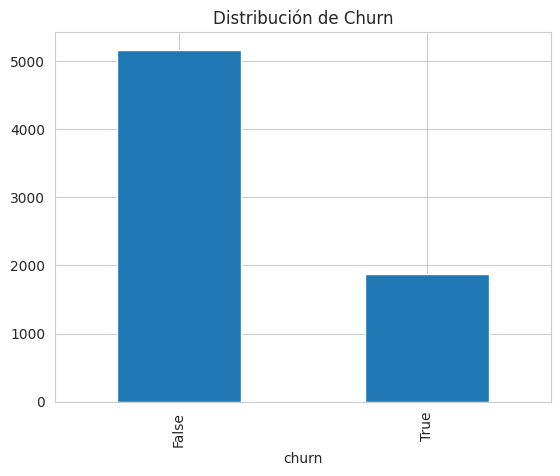

In [165]:
#d
import matplotlib.pyplot as plt
# revisar primnero la distribución de Churn (evasión)
datos_telecom['churn'].value_counts().plot(kind='bar', title='Distribución de Churn')
plt.show()

In [167]:
##Ahora a crear ala columna cuentas diarias
import numpy as np

# Suponiendo 30 días por mes
# Se puede ajustar si se necesita mayor precisión por mes
datos_telecom['cuentas_diarias'] = datos_telecom['charges.monthly'] / 30

# Opción: Redondear a 2 decimales
datos_telecom['cuentas_diarias'] = datos_telecom['cuentas_diarias'].round(2)

# Verificación
print(datos_telecom[['charges.monthly', 'cuentas_diarias']].head())

   charges.monthly  cuentas_diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80


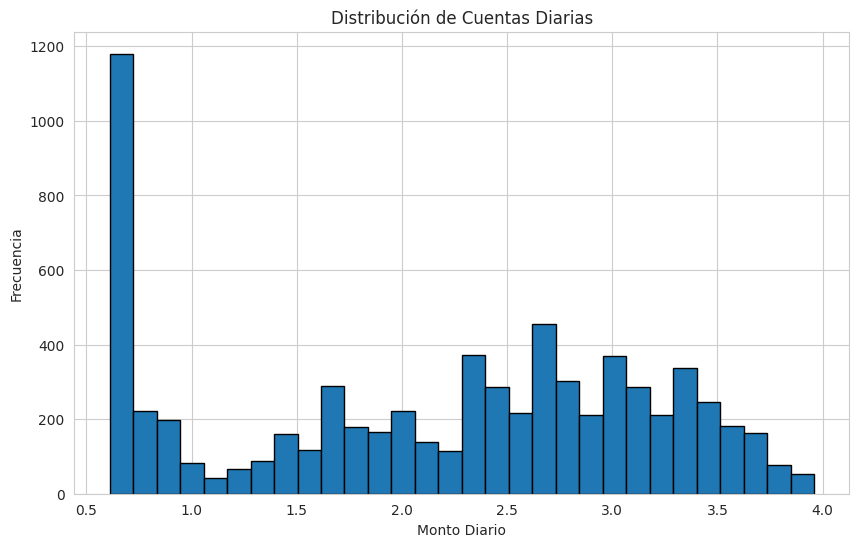

In [168]:
## para visualizar los datos
# crear un gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(datos_telecom['cuentas_diarias'], bins=30, edgecolor='black')
plt.title('Distribución de Cuentas Diarias')
plt.xlabel('Monto Diario')
plt.ylabel('Frecuencia')
plt.show()


In [169]:
#ahora a transformar los datos estandarizados en 1 y 0
#para facilitar el análisis
#senior citizen ya es tipo 0 y 1, solo habría que convertirlo a entero
# Lista de columnas textuales a convertir
columnas_binarias = [
    'churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'multiplelines'
]

# Convertir booleanos (True/False) a 1/0 directamente
for col in columnas_binarias:
    datos_telecom[col] = datos_telecom[col].astype(int)

# Verificación
print("\nTipos de datos y valores únicos:")
print(datos_telecom[columnas_binarias].dtypes)
print("\nEjemplo de valores:")
print(datos_telecom[columnas_binarias].head())



Tipos de datos y valores únicos:
churn               int64
partner             int64
dependents          int64
phoneservice        int64
paperlessbilling    int64
onlinesecurity      int64
onlinebackup        int64
deviceprotection    int64
techsupport         int64
streamingtv         int64
streamingmovies     int64
multiplelines       int64
dtype: object

Ejemplo de valores:
   churn  partner  dependents  phoneservice  paperlessbilling  onlinesecurity  \
0      0        0           0             0                 0               0   
1      0        0           0             0                 0               0   
2      1        0           0             0                 0               0   
3      1        0           0             0                 0               0   
4      1        0           0             0                 0               0   

   onlinebackup  deviceprotection  techsupport  streamingtv  streamingmovies  \
0             0                 0            0      

In [170]:
# Convertir a Int64 manteniendo el DataFrame
datos_telecom['seniorcitizen'] = datos_telecom['seniorcitizen'].astype('Int64')

# Verificación
print(datos_telecom[['seniorcitizen']].info())  # Tipo: Int64

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   seniorcitizen  7032 non-null   Int64
dtypes: Int64(1)
memory usage: 116.7 KB
None


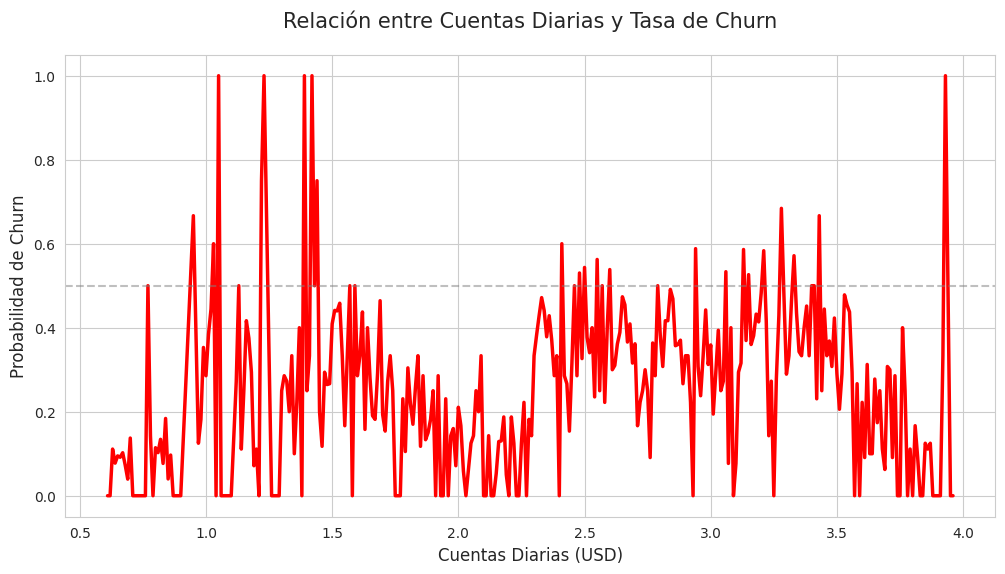

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Para crear el gráfico de línea
sns.lineplot(
    data=datos_telecom,
    x='cuentas_diarias',
    y='churn',
    estimator='mean',  # Promedio de Churn por valor diario
    errorbar=None,     # Sin barras de error para evitar la saturación
    color='red',
    linewidth=2.5
)

plt.title('Relación entre Cuentas Diarias y Tasa de Churn', fontsize=15, pad=20)
plt.xlabel('Cuentas Diarias (USD)', fontsize=12)
plt.ylabel('Probabilidad de Churn', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Para mejorar el análisis visual crear una línea horizontal de referencia
# representa el 50% de probabilidad
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

plt.show()


#Picos altos: Valores de cuentas_diarias donde la línea roja sube son "zonas de riesgo" (clientes con mayor probabilidad de abandonar).
#Picos bajos: Valores donde la línea baja indican clientes más leales.

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd


# Crear un DataFrame agregado para el gráfico (promedio de churn por cuentas_diarias)
df_agregado = datos_telecom.groupby('cuentas_diarias', as_index=False)['churn'].mean()

# Crear gráfico interactivo con Plotly
fig = px.line(
    df_agregado,
    x='cuentas_diarias',
    y='churn',
    labels={'cuentas_diarias': 'Cuentas Diarias (USD)', 'churn': 'Probabilidad de Churn'},
    title='Relación entre Cuentas Diarias y Tasa de Churn (Interactivo)',
    template='plotly_white',  # Similar a 'whitegrid' de Seaborn
    line_shape='linear'       # Mantiene el estilo de línea recta
)

# Añadir línea de referencia en y=0.5 (equivalente a plt.axhline)
fig.add_hline(
    y=0.5,
    line_dash="dash",
    line_color="gray",
    opacity=0.5,
    annotation_text="Límite de referencia",
    annotation_position="bottom right"
)

# Ajustar estilo para que se parezca al gráfico original
fig.update_layout(
    font=dict(size=12),
    xaxis=dict(tickvals=np.arange(0.2, df_agregado['cuentas_diarias'].max() + 0.2, 0.2)),
    yaxis=dict(title='Probabilidad de Churn', range=[0, 1]),
    hovermode="x unified"  # Muestra tooltips al pasar el cursor
)

# Mostrar el gráfico
fig.show()

In [173]:
# Lista de columnas categóricas a analizar
columnas_categoricas = ['gender', 'contract', 'paymentmethod', 'internetservice', 'seniorcitizen']

<ipython-input-174-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-174-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-174-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-174-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-174-1577514733>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

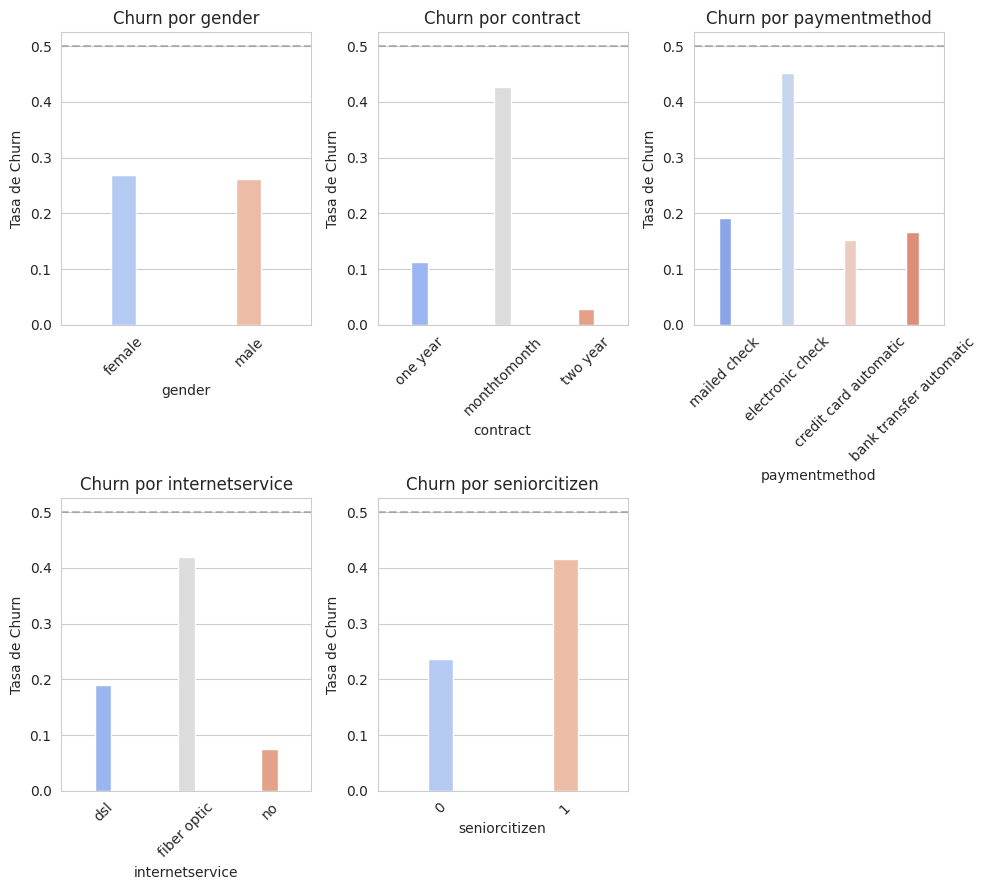

In [174]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd

#gráfico de barras apiladas
plt.figure(figsize=(10, 9))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(2, 3, i)
    sns.barplot(
        data=datos_telecom,
        x=col,
        y='churn',
        estimator='mean',
        errorbar=None,
        palette='coolwarm',
        width=0.2
    )
    plt.title(f'Churn por {col}')
    plt.ylabel('Tasa de Churn')
    plt.xticks(rotation=45)
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)  # Línea de referencia

plt.tight_layout()
plt.show()

In [175]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   string 
 1   churn             7032 non-null   int64  
 2   gender            7032 non-null   string 
 3   seniorcitizen     7032 non-null   Int64  
 4   partner           7032 non-null   int64  
 5   dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   int64  
 8   multiplelines     7032 non-null   int64  
 9   internetservice   7032 non-null   string 
 10  onlinesecurity    7032 non-null   int64  
 11  onlinebackup      7032 non-null   int64  
 12  deviceprotection  7032 non-null   int64  
 13  techsupport       7032 non-null   int64  
 14  streamingtv       7032 non-null   int64  
 15  streamingmovies   7032 non-null   int64  
 16  contract          7032 non-null   string 
 17  

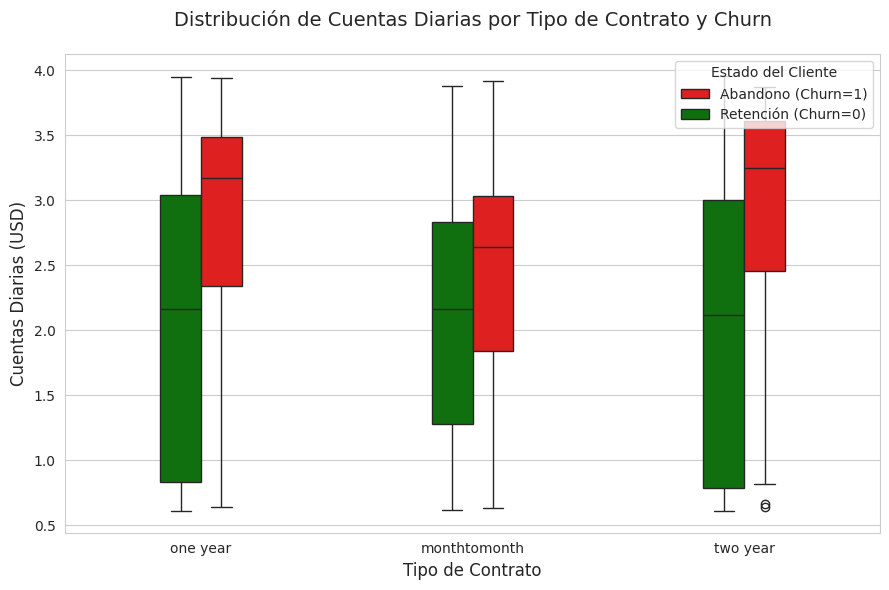

In [176]:
# distribucion de cuentas diaras vs churn
import plotly.express as px

plt.figure(figsize=(9, 6))

# Boxplot con colores y ancho ajustado
sns.boxplot(
    data=datos_telecom,
    x='contract',
    y='cuentas_diarias',
    hue='churn',
    palette={1: 'red', 0: 'green'},  # 1=Rojo (Abandono), 0=Verde (Retención)
    width=0.3
)

# Leyenda personalizada
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=[handles[1], handles[0]],
    labels=['Abandono (Churn=1)', 'Retención (Churn=0)'],
    title='Estado del Cliente',
    loc='upper right',
    facecolor='white'
)

plt.title('Distribución de Cuentas Diarias por Tipo de Contrato y Churn', fontsize=14, pad=20)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cuentas Diarias (USD)', fontsize=12)

plt.tight_layout()
plt.show()